This is a supervised, regression machine learning task: given a set of data with targets (in this case the score) included, we want to train a model that can learn to map the features (also known as the explanatory variables) to the target.

We will use the standard data science and machine learning libraries: `numpy`, `pandas`, and `scikit-learn`. We also use `matplotlib` and `seaborn` for visualization.

In [1]:
### Importing libararies

import pandas as pd
import numpy as np

We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize

In [2]:
## load the dataset
url = "https://raw.githubusercontent.com/PlayingNumbers/ds_salary_proj/master/glassdoor_jobs.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.tail()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom
955,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1


By looking at raw data we can see that we'll have to solve number of issues. we can see some values as -1 in founded and salary estimate columns.we have to look into them in data cleaning, other data looks pretty straightforward as we have ratings, company name,founding year and much mire columns with us

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


looks like no feature has `Nan` values but we can see some values like -1 in our dataset

In [6]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


as you can see we have some values replaced with -1.So we'll try to handle these things 

##  Data Cleaning
    1.Removing unwanted alphabet/special characters from the features
    2.Removing unwanted columns
    3.Convert Data to Correct Types
    4.Handling NaN/missing values
    5.Plotting bargraphs and countplots for numerical and categorical features respectively

In [7]:
### Removing unwanted column
df.drop(labels = 'Unnamed: 0',axis = 1,inplace = True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [8]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [9]:
### we'll try to handle Salary Estimate column


In [10]:
df['glassdoor est'] = df['Salary Estimate'].apply(lambda x: 1 if 'glassdoor est.' in x.lower() else 0)

In [11]:
df = df[df['glassdoor est'] == 1]

In [12]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,glassdoor est
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",1


In [13]:
### we'll drop some values where Salary estimate is -1 as `salary estimate` is our target variable
df= df[df['Salary Estimate'] != -1]

In [14]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,glassdoor est
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",1


In [15]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [16]:
df['Salary Estimate']

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
950    $58K-$111K 
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
955    $61K-$126K 
Name: Salary Estimate, Length: 713, dtype: object

In [17]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$','').replace('K',''))

In [18]:
df['Salary Estimate'].unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ', '93-149 ',
       '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ', '74-138 ',
       '64-112 ', '68-129 ', '52-113 ', '158-211 ', '20-39 ', '56-117 ',
       '63-99 ', '68-114 ', '41-95 ', '86-144 ', '80-139 ', '56-95 ',
       '120-189 ', '111-176 ', '84-146 ', '107-172 ', '49-85 ', '61-109 ',
       '88-148 ', '60-99 ', '41-72 ', '96-161 ', '65-130 ', '52-81 ',
       '139-220 ', '50-102 ', '85-139 ', '74-122 ', '99-157 ', '79-222 ',
       '57-118 ', '86-141 ', '94-154 ', '37-76 ', '100-160 ', '55-100 ',
       '60-114 ', '39-68 ', '64-107 ', '31-65 ', '34-62 ', '117-231 ',
       '79-134 ', '52-93 ', '55-116 ', '72-123 ', '74-1

In [19]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,glassdoor est
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,1
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",1
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",1


Note: Converting per hour salaries to per year salaries (assuming 45 work hours per week and 52 working weeks), and removing employer_provided_salary from the salary array.

In [20]:
### creating a function to convert salary
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
    
    x = minlimit.strip()
    y = maxlimit.strip()
    x = int(int(minlimit)*45*52/1000)
    y = int(int(maxlimit)*45*52/1000)
    return '{}-{}'.format(x,y)

df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
df['Salary Estimate'].unique()[380:]

array(['71-144 ', '32-57 ', '79-136 ', '48-113 ', '63-109', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

Now we'll try to split it as min salary and max salary and try to find avg salary from it so that our task gets easy.

In [21]:
df['min_salary']=df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df['max_salary']=df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))

In [22]:
df['avg_salary'] = (df['min_salary']+df['max_salary'])//2

In [23]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,glassdoor est,min_salary,max_salary,avg_salary
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,1,53,91,72
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,1,63,112,87
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,1,80,90,85
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",1,56,97,76
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",1,86,143,114


In [24]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

In [25]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,glassdoor est,min_salary,max_salary,avg_salary
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,1,53,91,72
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,1,63,112,87
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,1,80,90,85
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",1,56,97,76
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",1,86,143,114


### we'll handle the location anf headquarters column and try to check whether location affects the slaary estimate of data scientist

In [26]:
df['Location'] = df['Location'].apply(lambda x:x.split(',')[1])
df['Headquarters'] = df['Headquarters'].apply(lambda x:x.split(',')[1])

In [27]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,glassdoor est,min_salary,max_salary,avg_salary
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,CA,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,1,53,91,72
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,1,63,112,87
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,1,80,90,85
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",1,56,97,76
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",1,86,143,114


In [28]:
df['Founded'].value_counts()

-1       38
 2008    31
 2010    29
 1996    27
 2006    24
         ..
 1902     1
 1914     1
 1979     1
 1917     1
 1985     1
Name: Founded, Length: 102, dtype: int64

for handling missing values we'll try to plot founded column.


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 432x432 with 0 Axes>

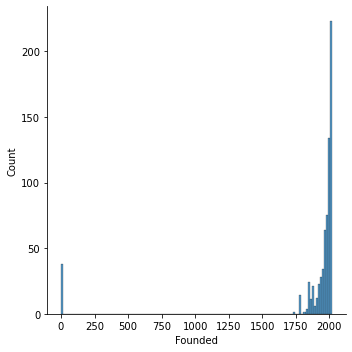

In [30]:
plt.figure(figsize=(6,6))
sns.displot(data = df , x='Founded')

As we can see our founded data is rightly skewed so we'll replace these missing values with median values.

In [31]:
# Handling -1 values in Founded column
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')

In [32]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,glassdoor est,min_salary,max_salary,avg_salary
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,CA,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,1,53,91,72
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,1,63,112,87
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,1,80,90,85
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",1,56,97,76
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",1,86,143,114


we'll try to handle Competitors column

In [33]:
#### Competitors count
df['Competitors'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x != -1 else 0)

In [34]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,glassdoor est,min_salary,max_salary,avg_salary
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,CA,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),1,1,53,91,72
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1,1,63,112,87
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),1,1,80,90,85
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,1,56,97,76
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,1,86,143,114


In [35]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,glassdoor est,min_salary,max_salary,avg_salary
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,CA,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),1,1,53,91,72
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1,1,63,112,87
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),1,1,80,90,85
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,1,56,97,76
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,1,86,143,114


to find out the effect of age of company on salary we'll create the new column


In [36]:
df['Age'] = 2020 - df['Founded']

In [37]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,glassdoor est,min_salary,max_salary,avg_salary,Age
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,CA,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),1,1,53,91,72,47
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1,1,63,112,87,36
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),1,1,80,90,85,10
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,1,56,97,76,55
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,1,86,143,114,22


In [38]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst'in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'data science related jobs'
    
    
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'Not Specified'

In [39]:
df['Job'] = df['Job Title'].apply(title_simplifier)
df['Seniority'] = df['Job Title'].apply(seniority)

In [40]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,glassdoor est,min_salary,max_salary,avg_salary,Age,Job,Seniority
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,CA,501 to 1000 employees,1973,Company - Private,...,Aerospace & Defense,$50 to $100 million (USD),1,1,53,91,72,47,data scientist,Not Specified
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,...,Health Care,$2 to $5 billion (USD),1,1,63,112,87,36,data scientist,Not Specified
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,...,Business Services,$100 to $500 million (USD),1,1,80,90,85,10,data scientist,Not Specified
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,...,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,1,56,97,76,55,data scientist,Not Specified
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,...,Business Services,Unknown / Non-Applicable,3,1,86,143,114,22,data scientist,Not Specified


In [41]:
# Python
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
 
# R studio 
df['R'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

# SQL 
df['SQL'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)

# AWS 
df['AWS'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

# Excel
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

# Google Cloud
df['GCP'] = df['Job Description'].apply(lambda x: 1 if 'google cloud' in x.lower() or 'gcp' in x.lower() else 0)

# Microsoft Azure
df['Azure'] = df['Job Description'].apply(lambda x: 1 if 'microsoft azure' in x.lower() or 'azure' in x.lower() else 0)

# Spark
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

# PyTorch
df['PyTorch'] = df['Job Description'].apply(lambda x: 1 if 'pytorch' in x.lower() else 0)

# TensorFlow
df['TensorFlow'] = df['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() or 'tf' in x.lower() else 0)

# Tableau
df['Tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

# Keras
df['Keras'] = df['Job Description'].apply(lambda x: 1 if 'keras' in x.lower() else 0)

In [42]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,SQL,AWS,Excel,GCP,Azure,Spark,PyTorch,TensorFlow,Tableau,Keras
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,CA,501 to 1000 employees,1973,Company - Private,...,0,0,1,0,0,0,0,0,1,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,...,0,0,0,0,0,0,0,1,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,...,1,0,1,0,0,1,0,1,0,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,...,1,0,1,0,0,0,0,0,0,0


We'll remove the unecessary columns from the dataset


In [43]:
df['Type of ownership'].value_counts()

Company - Private                 390
Company - Public                  188
Nonprofit Organization             54
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               11
Other Organization                  3
School / School District            2
Unknown                             1
Name: Type of ownership, dtype: int64

In [44]:
df.drop(labels =['Job Title','Salary Estimate','Job Description'],axis = 1,inplace = True)

In [45]:
df.head()

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,...,SQL,AWS,Excel,GCP,Azure,Spark,PyTorch,TensorFlow,Tableau,Keras
0,3.8,Tecolote Research,NM,CA,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),...,0,0,1,0,0,0,0,0,1,0
1,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),...,0,0,0,0,0,0,0,1,0,0
2,4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),...,1,0,1,0,0,1,0,1,0,0
3,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),...,0,0,0,0,0,0,0,0,0,0
4,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,...,1,0,1,0,0,0,0,0,0,0


ok so now we have cleaned data with us , now we'll try to visualize it and try to get as much insgihts as posssible

In [46]:
df.to_csv('Salary_data_cleaned1.csv',index = False)